# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах 
- balcony — число балконов
- ceiling_height — высота потолков
- cityCenters_nearest — расстояние до центра города
- days_exposition — сколько дней было размещено объявления
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты 
- kitchen_area — площадь кухни в квадратных метрах 
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах
- locality_name — название населённого пункта
- open_plan — свободная планировка
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка 
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма 
- rooms — число комнат
- studio — квартира-студия 
- total_area — площадь квартиры в квадратных метрах 
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Прочитаем файл real_estate_data.csv.csv и сохраним его в переменной sale_flat.

In [1]:
import pandas as pd
sale_flat = pd.read_csv('/datasets/real_estate_data.csv')

Получим первых 10 строк таблицы для наглядного представления

In [2]:
sale_flat.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Вот и первая проблема. Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. Исправим это добавив параметр sep.

In [3]:
sale_flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Заново получим первые 10 строк таблицы

In [4]:
pd.set_option('display.max_columns', 500)
sale_flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о данных

In [5]:
sale_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Каждая строка таблицы содержит подробную информацию объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Первоначальная проблема, которую необходимо решить это пропуски и замена типа данных. Далее необходимо будет посчитать и добавить в таблицу данные, необходимые для дальнейшего анализа.

### Шаг 2. Предобработка данных

### Обработка пропусков

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [6]:
sale_flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пустые значения свидетельствуют, что по некоторым объявлениям доступна не вся информация. Причины могут быть разные: человеческий фактор или проблемы с записью данных. Заполнил пропуски в столбцах, которые понадобятся нам для последующего анализа:
- отсутствующих значений в 'living_area' и 'kitchen_area' не так много, поэтому заменем их с медианой с расчитанным коэффицентом;
- отсутстующие значения в столбце 'ceiling_height' заменем в шаге 4, после расчета выбросов в данных;
- картографические данные не будем заполнять по причине того, что мы так можем резко исказить правдоподобность. 

In [7]:
# <Определим коэффицент отношения общей площади к жилой через медиану>
a = sale_flat['total_area'].median() / sale_flat['living_area'].median()

# <Заменем пустые значения в столбце жилая площадь на отношение известной жилой площади и найденного коэффицента>
sale_flat['living_area'].fillna((sale_flat['total_area'] / a), inplace=True)

In [8]:
# <Определим коэффицент отношения общей площади к площади кухни через медиану>
b = sale_flat['total_area'].median() / sale_flat['kitchen_area'].median()

# <Заменем пустые значения в столбце площадь кухни на отношение известной жилой площади и найденного коэффицента>
sale_flat['kitchen_area'].fillna((sale_flat['total_area'] / b), inplace=True)

### Вывод

Были обнаружены пустые значения в столбцах с жилой площадь, площадью кухни и высоте потолков. Поскольку эти сведения важны для дальнейшего анализа пустые значения в столбцах жилая площадь и площадь кухни, не просто удаляем, а заполняем медианой.

### Замена типа данных

Заменим тип данных у двух столбцов:
- 'last_price' с float64 на int64, т.к. он затрачивает меньше памяти при вычисления;
- 'first_day_exposition' на datetime, т.к. дата поданобится для дальнейшего анализа

In [9]:
# <Замена типа данных по стоимости>
sale_flat['last_price'] = sale_flat['last_price'].astype('int', errors = 'ignore')

In [10]:
# <Замена типа данных у столбца дата публикации на datetime>
sale_flat['first_day_exposition'] = pd.to_datetime(sale_flat['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

### Шаг 3. Посчитайте и добавьте в таблицу

Расчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры, разбитый по вариантам — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [11]:
# <Добавление столбца с ценой квадратного метра>
sale_flat['one_meter_price'] = sale_flat['last_price'] / sale_flat['total_area']
sale_flat['one_meter_price'] = sale_flat['one_meter_price'].round(0)

In [12]:
# <Добавление столбца с днем недели, месяца и года публикации объявления>
sale_flat['weekday'] = sale_flat['first_day_exposition'].dt.weekday
sale_flat['month'] = sale_flat['first_day_exposition'].dt.month
sale_flat['year'] = sale_flat['first_day_exposition'].dt.year

In [13]:
# <Функция добавления столбца с категорией этажа>
def floor_group(row):
   floor = row['floor']
   floors_total = row['floors_total']
   if floor == 1:
       return 'первый'
   if floor == floors_total:
       return 'последний'
   return 'другой'

sale_flat['floor_group'] = sale_flat.apply(floor_group, axis=1)

In [14]:
# <Добавление столбца соотношения жилой и общей площади, а также отношение площади кухни к общей>
sale_flat['living_total'] = sale_flat['living_area'] / sale_flat['total_area']
sale_flat['living_total'] = sale_flat['living_total'].round(2)
sale_flat['kitchen_total'] = sale_flat['kitchen_area'] / sale_flat['total_area']
sale_flat['kitchen_total'] = sale_flat['kitchen_total'].round(2)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1 Построение гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb96664150>]],
      dtype=object)

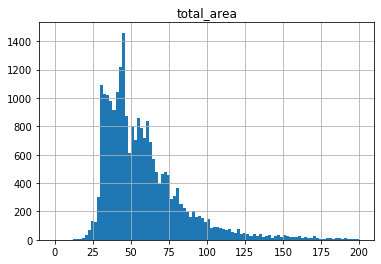

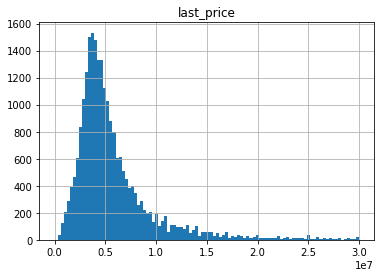

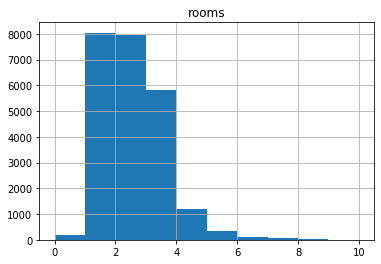

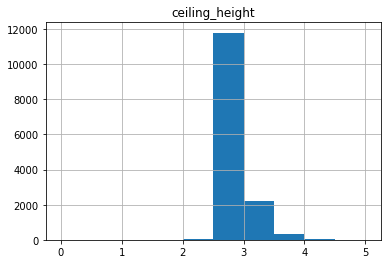

In [15]:
# <Построение гистограмм>
sale_flat.hist('total_area',bins=100, range = (0, 200))
sale_flat.hist('last_price',bins=100, range = (0, 30000000))
sale_flat.hist('rooms', range = (0, 10))
sale_flat.hist('ceiling_height', range = (0, 5))

По гистограммам видно, что наиболее распространеные квартиры:
- площадью от 30 до 60 квадратных метров
- c ценой от 4 до 5 миллионов рублей
- от 1 до 3 комнат
- высотой потолков от 2,5 м

Квартиры менее 180 квадратных метров уже редки. Продолжаем работать с наблюдениями, удовлетворяющими условию:
общая площадь квартиры < 180 квадратных метров Так же видно, что по некоторым квартирам указаны нулевые значения по числу комнат и есть подозрительные данные  по высоте потолков. 

Заменим комнаты с нулевыми значениями на медиану.

#### 4.2 Изучение времени продажи квартиры

Построим гистограмму. Посчитаем среднее и медиану.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb96cc8e50>]],
      dtype=object)

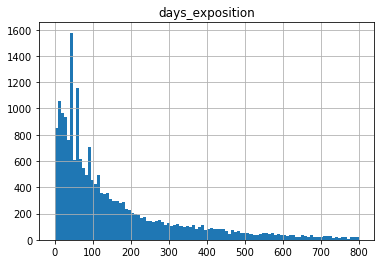

In [16]:
# <Строим гистограмму по времени продажи квартиры>
sale_flat.hist('days_exposition',bins=100, range = (0, 800))

In [17]:
# <Считаем среднее по времени продажи квартиры>
sale_flat['days_exposition'].mean()

180.88863436982163

In [18]:
# <Считаем медиану по времени продажи квартиры>
sale_flat['days_exposition'].median()

95.0

Cреднее почти в 2 раза больше медианы. Это говорит о том, что в распределении длинный хвост высоких значений (или несколько очень больших значений), влияющих на среднее, но не на медиану.

На основе этих данных можно сделать вывод, что продажа квартиры обычно занимает 95 дней.
Продажа квартиры свыше 800 дней — уже редки. 
Продажа квартиры, занимающая менее 45 дня можно считать быстрой. Более 232 - долгой.
Продолжаем работать с наблюдениями, удовлетворяющими условию:
время продажи квартиры < 800 дней.

#### 4.3 Убераем редкие и выбивающиеся значения

Проведем анализ высоты потолков, построив диаграмму размаха и найди границы до выбросов данных.

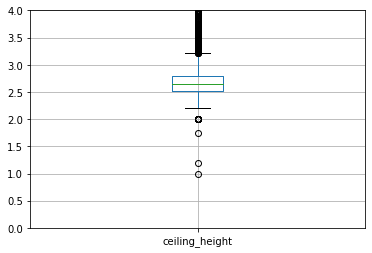

In [19]:
# <Построим диаграмму размаха для высоты потолков>
import matplotlib.pyplot as plt
plt.ylim(0, 4)
boxplot = sale_flat.boxplot(column=['ceiling_height'])

In [20]:
# <Найдем значение правого уса для высоты потолков>
top_wisk_cap = sale_flat['ceiling_height'].quantile(0.75)  + 1.5 * (sale_flat['ceiling_height'].quantile(0.75) - sale_flat['ceiling_height'].quantile(0.25))
top_wisk_cap.round(1)

3.2

In [21]:
# <Найдем значение левого уса для высоты потолков>
bottom_wisk_cap = sale_flat['ceiling_height'].quantile(0.25)  - 1.5 * (sale_flat['ceiling_height'].quantile(0.75) - sale_flat['ceiling_height'].quantile(0.25))
bottom_wisk_cap.round(1)

2.1

Все что находится за пределами «усов» примем за выбросы. Заменем выбросы на медиану.

In [22]:
# <Заменем выбросы в столбце высота потолков на медиану
sale_flat.loc[sale_flat['ceiling_height'] < 2.10, 'ceiling_height'] = sale_flat['ceiling_height'].median()
sale_flat.loc[sale_flat['ceiling_height'] > 3.20, 'ceiling_height'] = sale_flat['ceiling_height'].median()

In [23]:
# <Заменем пустые значения в столбце высота потолков на медиану>
sale_flat['ceiling_height'].fillna(sale_flat['ceiling_height'].median(), inplace=True)

Заменили выпадающие значение по высоте потолоков. Далее продолжим работать с наблюдениями, удовлетворяющими условию:
время продажи квартиры менее 800 дней и общая площадь менее 180 квадратных метров.

#### 4.4 Факторы больше всего влияющие на стоимость квартиры

Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего) и удалённости от центра.

In [24]:
# <Сохраним отфильтрованные данные>
sale_flat_filter = sale_flat.query('days_exposition < 800 and total_area < 180')

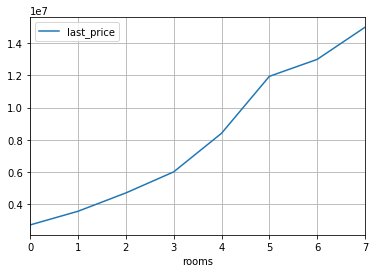

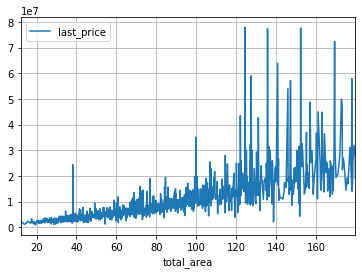

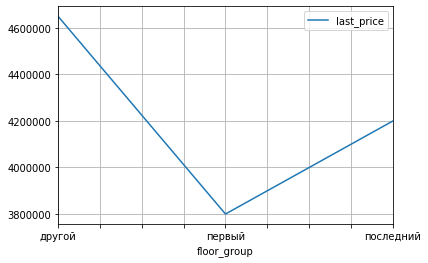

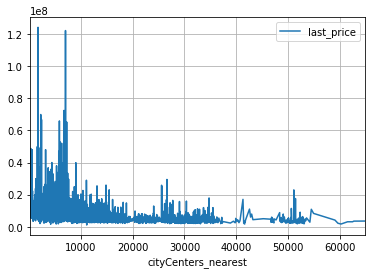

In [25]:
# <Строим графики зависимости цены от общей площади, числа комнат, этажа и удаленности от центра>
plot_sale_flat_rooms = ['rooms']
plot_sale_flat_total_area = ['total_area', 'floor_group', 'cityCenters_nearest']

for name in plot_sale_flat_rooms:
    sale_flat_filter.pivot_table(index=name , values='last_price', aggfunc='median').plot(grid=True)
for name in plot_sale_flat_total_area:
    sale_flat_filter.pivot_table(index=name , values='last_price', aggfunc='median').plot(grid=True) 

In [26]:
# <Посчитаем коэффиценты корреляции между ценой, общей площади и числом комнат >
ratio = sale_flat_filter.pivot_table(index=name, values=['last_price','total_area', 'rooms'])
ratio.corr()

,last_price,rooms,total_area
last_price,1.000000,0.411333,0.696102
rooms,0.411333,1.000000,0.773975
total_area,0.696102,0.773975,1.000000


По графикам можно сделать вывод: 
- c увеличением площади и количества комнат возрастает цена
- самые дешевые квартиры на первых этажах
- cамые дорогие в центре города
- цена больше зависит от общей площади, чем от числа комнат

Также изучим зависимость от даты размещения: дня недели, месяца и года.

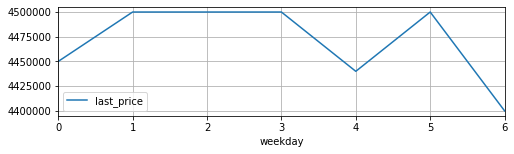

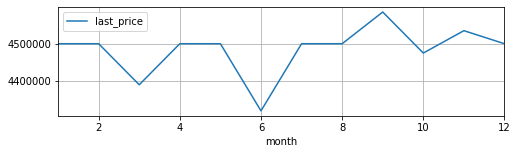

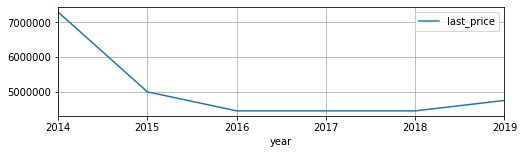

In [27]:
# <Строим графики зависимости цены от дня недели, месяца и года>
plot_sale_flat2 = ['weekday', 'month', 'year']

for name in plot_sale_flat2:
    sale_flat_filter.pivot_table(index=name , values='last_price', aggfunc='median').plot(grid=True, figsize=(8, 2))

По графика можно сделать вывод, что низкие цены по объявлениям размещенным по воскресеньям и в июне. Самые низкие цены были в 2016 и 2017 годах, с 2018 цены начали расти.

#### 4.5 Анализ 10 населённых пунктов с наибольшим числом объявлений

Проведем анализ 10 населённых пунктов с наибольшим числом объявлений

In [28]:
# <Создадим сводную таблицу по количеству объявлений>
locality_name_pivot = sale_flat.pivot_table(index='locality_name', values='total_images', aggfunc='count')
locality_name_pivot.columns = ['total_publication']

# <Посчитаем среднюю цену квадратного метра и перенесем данные в первую таблицу>
price_mean = sale_flat.pivot_table(index='locality_name', values='one_meter_price', aggfunc='mean')
locality_name_pivot['one_meter_price'] = price_mean['one_meter_price']

# <Выведем ТОП 10 с сортировкой по убыванию стоимости>
locality_name = locality_name_pivot.sort_values(by = 'total_publication', ascending=False).head(10).round(2)
locality_name.sort_values(by = 'one_meter_price', ascending=False)

,total_publication,one_meter_price
locality_name,,
Санкт-Петербург,15721,114849.01
Пушкин,369,103125.82
деревня Кудрово,299,92473.59
посёлок Парголово,327,90175.89
посёлок Мурино,522,85752.18
посёлок Шушары,440,78677.38
Колпино,338,75424.57
Гатчина,307,68746.11
Всеволожск,398,68654.47


Самые дорогие квартиры (из ТОП 10 по количеству объявлений) находятся в Санкт-Петербурге и Пушкине. Самые дешевые в Всеволожске и Выборге. Это объясняется отдаленостью от метро и более скромными жилыми комплексами.

#### 4.6 Изучение зависимости цены квартиры в Санкт-Петербурге от  удалённости до центра 
Выделим квартиры в Санкт-Петербурге, расчитаем среднюю цену для каждого километра и построим график.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


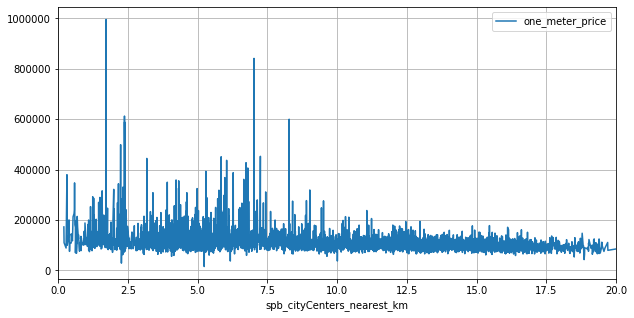

In [29]:
# <Выделим квартиры в Санкт-Петербурге>
df_spb = sale_flat_filter[sale_flat_filter['locality_name'] == 'Санкт-Петербург']

# <Создадим столбец с рассоянием до центра в километрах>
df_spb['spb_cityCenters_nearest_km'] = df_spb['cityCenters_nearest'] / 1000

# <Создадим график>
(df_spb
    #.query('last_price < 12000000')
    .pivot_table(index='spb_cityCenters_nearest_km', values='one_meter_price')
    .plot(grid=True, xlim = (0, 20), figsize = (10,5))
)

По графику видно, что спад цены одно квадратного метра идет примерно на 9 км. Примем границу - все что находится ближе 9 км будем считать центром.

#### 4.7 Изучение квартир в центре

Выделим сегмент квартир в центре и проанализируем.

In [30]:
# <Выделим квартиры в центре Санкт-Петербурге>
df_spb_central = df_spb[df_spb['spb_cityCenters_nearest_km'] < 9]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb931b1c10>]],
      dtype=object)

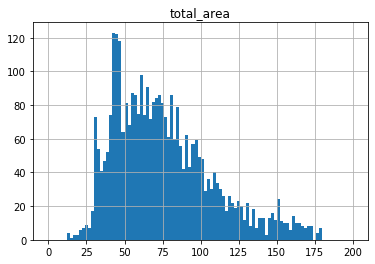

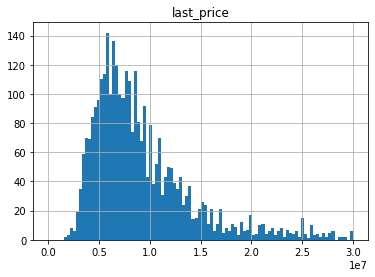

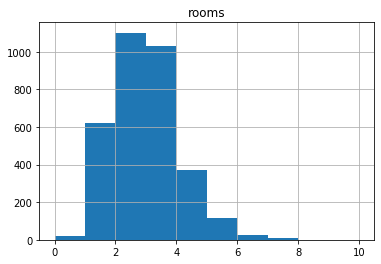

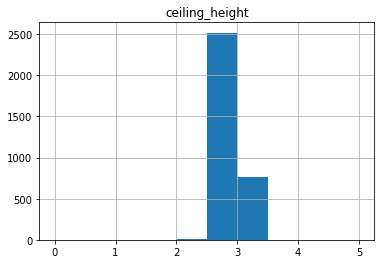

In [31]:
# <Построение гистограмм>
df_spb_central.hist('total_area',bins=100, range = (0, 200))
df_spb_central.hist('last_price',bins=100, range = (0, 30000000))
df_spb_central.hist('rooms', range = (0, 10))
df_spb_central.hist('ceiling_height', range = (0, 5))

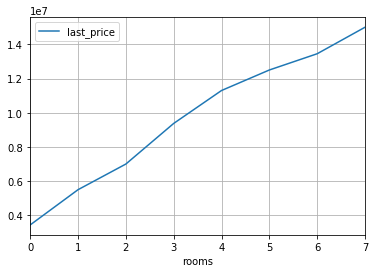

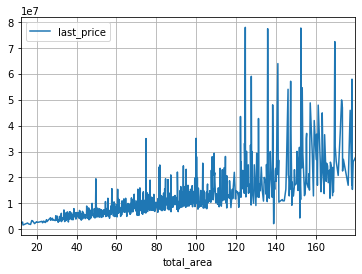

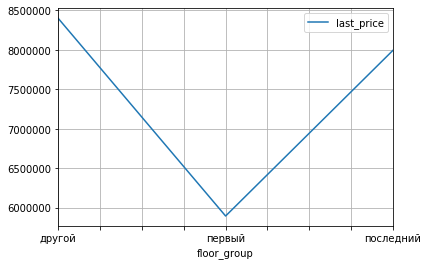

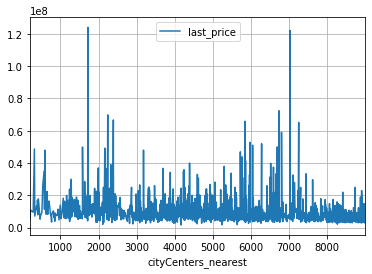

In [32]:
# <Строим графики зависимости цены от общей площади, числа комнат, этажа и удаленности от центра>
plot_central_rooms = ['rooms']
plot_central_total_area = ['total_area', 'floor_group', 'cityCenters_nearest']

for name in plot_central_rooms:
    df_spb_central.pivot_table(index=name , values='last_price', aggfunc='median').plot(grid=True)
for name in plot_central_total_area:
    df_spb_central.pivot_table(index=name , values='last_price', aggfunc='median').plot(grid=True) 

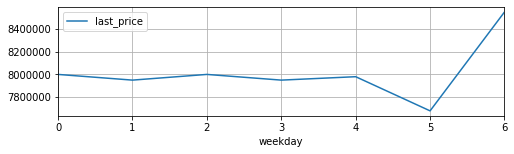

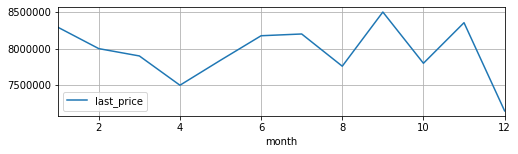

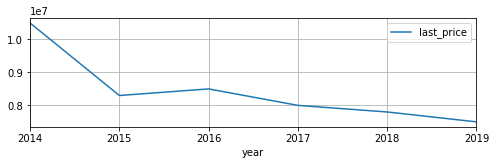

In [33]:
# <Строим графики зависимости цены от дня недели, месяца и года>
plot_central = ['weekday', 'month', 'year']

for name in plot_central:
    df_spb_central.pivot_table(index=name , values='last_price', aggfunc='median').plot(grid=True, figsize=(8, 2))

По гистограммам видно, что в центре города наиболее распространеные квартиры:
- площадью от 30 до 100 квадратных метров
- c ценой от 5 до 8 млн. рублей
- от 2 до 3 комнат
- высотой потолков 2,5 м

В центре города наблюдаем схожую со всем городом зависимость цены от числа комнат, этажа, удалённости от центра. Отличие - спад цен, начиная от 2016 по 2019 года.

### Шаг 5. Общий вывод

В результате анализа выявлена зависимость цены квартиры от общей площади, числа комнат, удаленности от центра, этажности и дня размещения, при этом общая площадь больше влияет на цену, чем число комнат. Так же было выявлено, что самые дорогие квартиры находятся в Санкт-Петербурге и Пушкине. Самые дешевые в Всеволожске и Выборге. 

Квартиры в центре города по сравнению со всем городом отличаются более высокой стоимостью (примерно на 2 млн. руб.), большой метражностью и количеством комнат. Так же на них зафиксирован спад цен начинаю с 2016 года. 